# Outlier

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


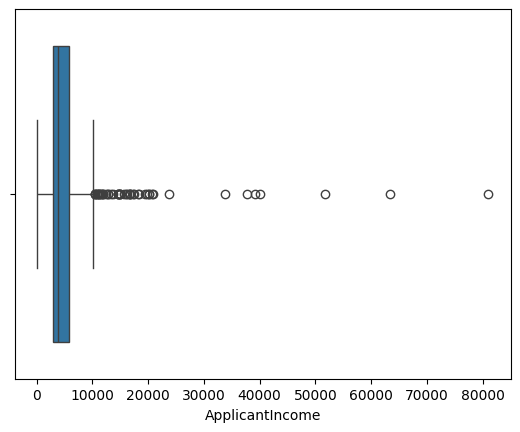

In [8]:
sns.boxplot(x = "ApplicantIncome", data= dataset)
plt.show()


C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_15860\4246328762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


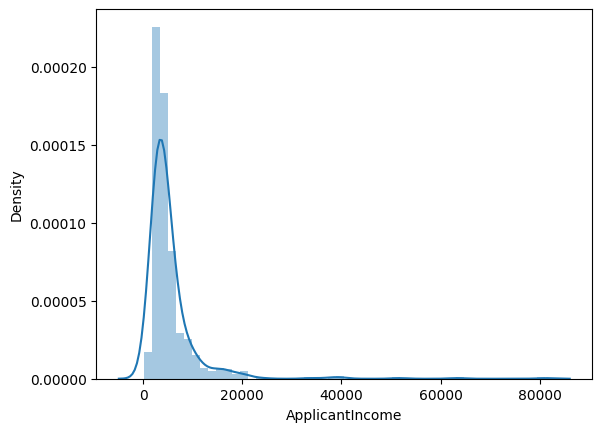

In [11]:
sns.distplot(dataset["ApplicantIncome"])
plt.show()

In [12]:
l = [5,6,7,5,8]
sum(l)/len(l)

6.2

In [13]:
l = [5,6,7,5,8,100]
sum(l)/len(l)
# in this we see our data is extremely increses which denote wrong dataset to overcome the problem use outliers

21.833333333333332

# Outlier removal using IQR(Inter quantire range)


In [14]:
dataset.shape

(614, 13)

In [16]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
print(q1,q3)

0.0 2297.25


In [17]:
IQR = q3 - q1

In [19]:
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)
min_range,max_range

(np.float64(-3445.875), np.float64(5743.125))

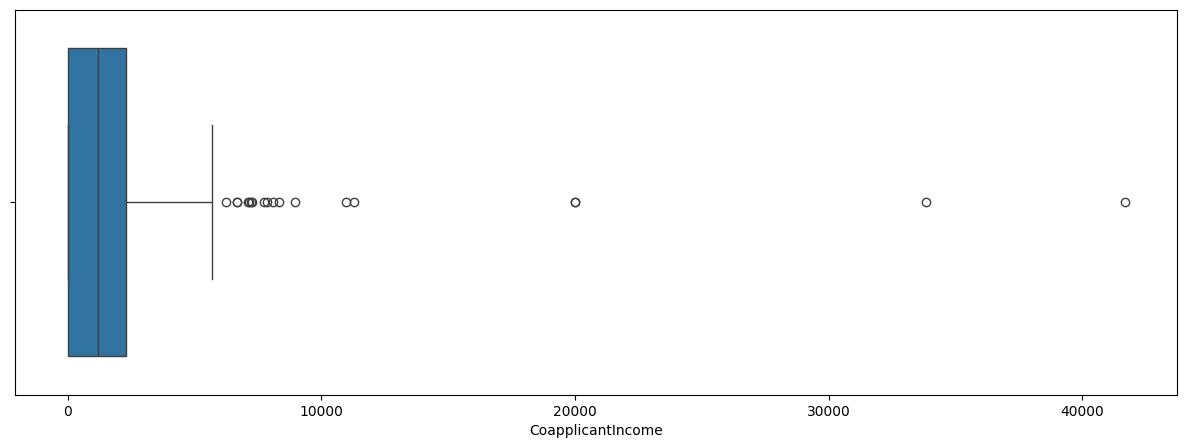

In [23]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "CoapplicantIncome", data= dataset)
plt.show()

In [24]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

In [25]:
new_dataset.shape

(596, 13)

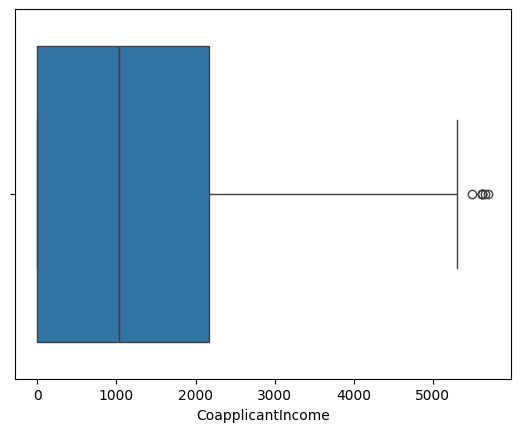

In [30]:

sns.boxplot(x = "CoapplicantIncome", data= new_dataset)
plt.show()

# Outlier removal using ZScore

#in this we remove less outlier thats we use more efficient data in the dataset

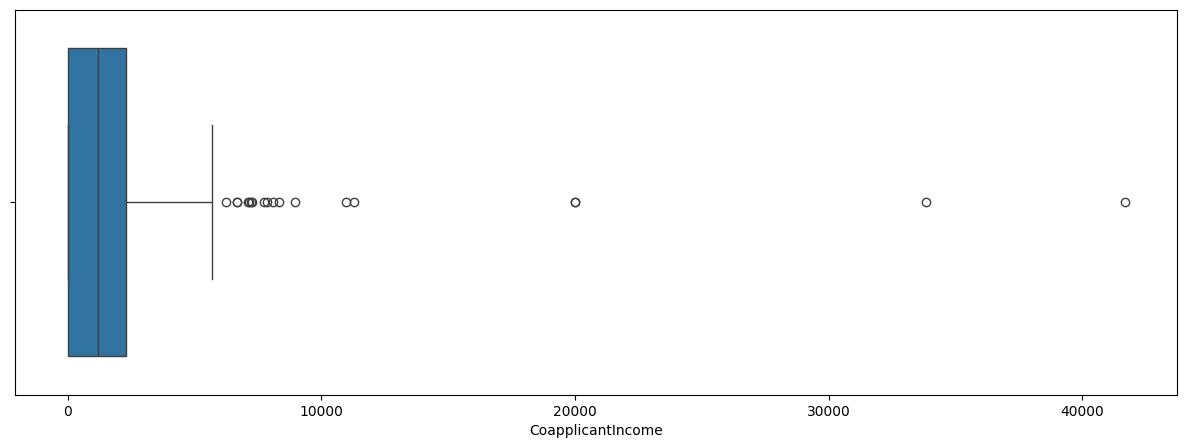

In [31]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "CoapplicantIncome", data= dataset)
plt.show()

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_15860\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


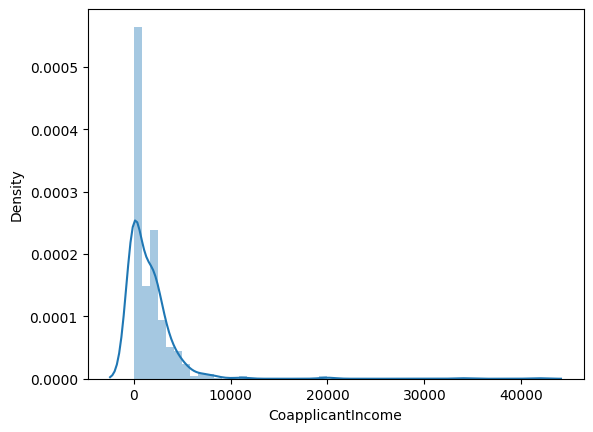

In [32]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [33]:
min_range = dataset["CoapplicantIncome"].mean()- (3*dataset["CoapplicantIncome"].std())
max_range = dataset["CoapplicantIncome"].mean()+ (3*dataset["CoapplicantIncome"].std())
min_range, max_range

(np.float64(-7157.4993096454655), np.float64(10399.990905699668))

In [34]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

In [35]:
new_dataset.shape

(608, 13)

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_15860\3647169822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["CoapplicantIncome"])


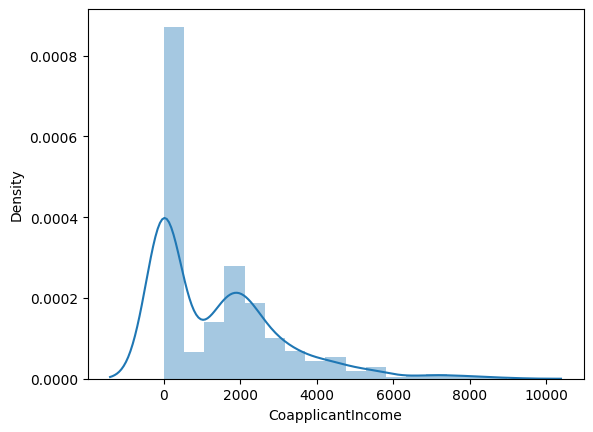

In [36]:
sns.distplot(new_dataset["CoapplicantIncome"])
plt.show()

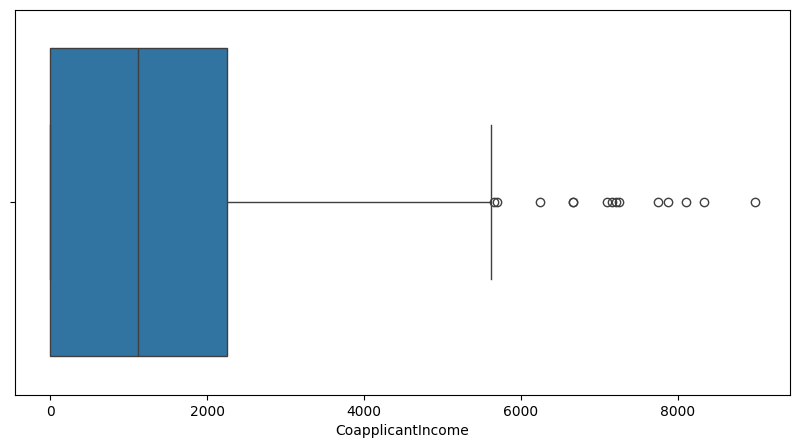

In [37]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "CoapplicantIncome", data= new_dataset)
plt.show()

In [38]:
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean())/dataset["CoapplicantIncome"].std()
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [39]:
dataset["z_score"] = z_score

In [41]:
dataset[dataset["z_score"]<3].shape

(608, 14)